# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [131]:
# подключить необходимые библиотеки

# Ваш код здесь
#!pip install psycopg2-binary
import psycopg2 as pg
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

import warnings
warnings.filterwarnings ('ignore')

![](database_modul_6.png)

In [2]:
# считать данные

# Ваш код здесь

# Подключимся к базе данных
conn =pg.connect(dbname='module_6', user='work', password='postgres', host='localhost')
cursor = conn.cursor()
# Прочитаем названия публичных таблиц базы данных
cursor.execute('''
                  SELECT table_name
                  FROM information_schema.tables
                  WHERE table_schema='public' AND table_type='BASE TABLE'
              ''')
tables = [name_table[0] for name_table in cursor.fetchall()]
print('Перечень всех таблиц:\n', *tables)

Перечень всех таблиц:
 d_work d_clients d_agreement d_last_credit d_job d_loan d_close_loan d_salary d_pens


In [3]:
# Заполним датафреймы данными из публичных таблиц базы данных
names_df = []
count_duplicated = 0
for table in tables:
    query = f'SELECT * FROM {table}'
    name_df = f'df_{table}'
    locals()[name_df] = pd.read_sql(query, conn)
    print(f'Для таблицы {table} заполнен датафрейм {name_df}.')
    print(f'  Размер таблицы: {locals()[name_df].shape}.')
    count_duplicated = len(locals()[name_df][locals()[name_df].duplicated()])
    names_df.append(name_df)
    if count_duplicated > 0:
        print(f'  В таблице дубликатов: {count_duplicated}.', end=' ')
        locals()[name_df].drop_duplicates(inplace=True)
        print(f'Дубликаты удалены. Размер обновлённой таблицы: {locals()[name_df].shape}\n')
    else:
        print(f'  Дубликатов в таблице: {count_duplicated} нет\n')
        

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

Для таблицы d_work заполнен датафрейм df_d_work.
  Размер таблицы: (3, 2).
  Дубликатов в таблице: 0 нет

Для таблицы d_clients заполнен датафрейм df_d_clients.
  Размер таблицы: (16000, 14).
  Дубликатов в таблице: 0 нет

Для таблицы d_agreement заполнен датафрейм df_d_agreement.
  Размер таблицы: (15223, 3).
  Дубликатов в таблице: 0 нет

Для таблицы d_last_credit заполнен датафрейм df_d_last_credit.
  Размер таблицы: (15223, 4).
  Дубликатов в таблице: 0 нет

Для таблицы d_job заполнен датафрейм df_d_job.
  Размер таблицы: (15223, 5).
  Дубликатов в таблице: 0 нет

Для таблицы d_loan заполнен датафрейм df_d_loan.
  Размер таблицы: (21126, 2).
  Дубликатов в таблице: 0 нет

Для таблицы d_close_loan заполнен датафрейм df_d_close_loan.
  Размер таблицы: (21126, 2).
  Дубликатов в таблице: 0 нет

Для таблицы d_salary заполнен датафрейм df_d_salary.
  Размер таблицы: (15523, 3).
  В таблице дубликатов: 300. Дубликаты удалены. Размер обновлённой таблицы: (15223, 3)

Для таблицы d_pens зап

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

In [4]:
# Выведем параметры датафреймов
for name_df in names_df:
    print(f'СТРУКТУРА ДАТАФРЕЙМА {name_df}:')
    print(locals()[name_df].info(), '\n')
    print(f'ПРИМЕР СТРОКИ ДАТАФРЕЙМА {name_df}:')
    print(locals()[name_df].head(2), '\n\n')

СТРУКТУРА ДАТАФРЕЙМА df_d_work:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3 non-null      float64
 1   comment  3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes
None 

ПРИМЕР СТРОКИ ДАТАФРЕЙМА df_d_work:
    id      comment
0  1.0     работает
1  2.0  не работает 


СТРУКТУРА ДАТАФРЕЙМА df_d_clients:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       16000 non-null  float64
 1   age                      16000 non-null  float64
 2   gender                   16000 non-null  float64
 3   education                16000 non-null  object 
 4   marital_status           16000 non-null  object 
 5   child_total              1

In [6]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# Ваш код здесь

In [48]:
# Посчитаем количвесвто ссуд, выданных у каждому клиенту
# Добавим данные о закрытых и не закрытых ссудах
df_loan = df_d_loan.merge(df_d_close_loan, on='id_loan', how='left').groupby('id_client').\
                                                                     agg({'id_loan': 'count',
                                                                         'closed_fl': 'sum'})
df_loan['id_client'] = df_loan.index
df_loan.reset_index(drop=True, inplace=True)

In [49]:
# Добавим данные клиентов в датасет с зафиксированными откликами клиентов на предложения банка
df_d_clients = df_d_clients.rename(columns={'id': 'id_client'})
df = df_d_agreement.merge(df_d_clients, on='id_client', how='left')

# Добавим данные о личном и семейном доходе клиента
df = df.merge(df_d_salary, on='id_client', how='left')

# Добавим данные о взятых и закрытых клиентами ссуд
df = df.merge(df_loan, on='id_client', how='left')

df.head(3)

,agreement_rk,id_client,target,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto,family_income,personal_income,id_loan,closed_fl
0,59910150.0,106804370.0,0.0,49.0,1.0,Среднее специальное,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0,от 10000 до 20000 руб.,5000.0,1,1.0
1,59910230.0,106804371.0,0.0,32.0,1.0,Среднее,Состою в браке,3.0,3.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0,от 10000 до 20000 руб.,12000.0,1,1.0
2,59910525.0,106804372.0,0.0,52.0,1.0,Неполное среднее,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0,от 10000 до 20000 руб.,9000.0,2,1.0


In [53]:
# Приведём названия колонок датасет к заданным в постановке задачи
# (название колонок дополнительных фич - остаётся маленькими буквами)
df = df.rename(columns={'id_client': 'ID', 'agreement_rk': 'AGREEMENT_RK', 'target': 'TARGET',
                        'age': 'AGE', 'socstatus_work_fl': 'SOCSTATUS_WORK_FL',
                        'socstatus_pens_fl': 'SOCSTATUS_PENS_FL', 'gender': 'GENDER',
                        'child_total' : 'CHILD_TOTAL', 'dependants': 'DEPENDANTS',
                        'personal_income': 'PERSONAL_INCOME', 'id_loan': 'LOAN_NUM_TOTAL',
                        'closed_fl' :'LOAN_NUM_CLOSED'})
df

,AGREEMENT_RK,ID,TARGET,AGE,GENDER,education,marital_status,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto,family_income,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150.0,106804370.0,0.0,49.0,1.0,Среднее специальное,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0,от 10000 до 20000 руб.,5000.0,1,1.0
1,59910230.0,106804371.0,0.0,32.0,1.0,Среднее,Состою в браке,3.0,3.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0,от 10000 до 20000 руб.,12000.0,1,1.0
2,59910525.0,106804372.0,0.0,52.0,1.0,Неполное среднее,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0,от 10000 до 20000 руб.,9000.0,2,1.0
3,59910803.0,106804373.0,0.0,39.0,1.0,Высшее,Состою в браке,1.0,1.0,2.0,1.0,Ростовская область,Ростовская область,Ростовская область,1.0,0.0,от 20000 до 50000 руб.,25000.0,1,1.0
4,59911781.0,106804374.0,0.0,30.0,0.0,Среднее,Состою в браке,0.0,0.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0,от 10000 до 20000 руб.,12000.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424.0,106819588.0,0.0,25.0,0.0,Среднее,Состою в браке,1.0,1.0,2.0,1.0,Воронежская область,Воронежская область,Воронежская область,0.0,0.0,от 10000 до 20000 руб.,12000.0,3,2.0
15219,75291888.0,106819589.0,0.0,51.0,1.0,Среднее специальное,Состою в браке,2.0,0.0,2.0,1.0,Башкирия,Башкирия,Башкирия,0.0,0.0,от 20000 до 50000 руб.,10000.0,1,0.0
15220,75291923.0,106819590.0,0.0,22.0,1.0,Среднее,Не состоял в браке,1.0,1.0,2.0,1.0,Брянская область,Брянская область,Брянская область,0.0,0.0,от 5000 до 10000 руб.,6000.0,1,0.0
15221,75291960.0,106819591.0,0.0,60.0,1.0,Среднее,Вдовец/Вдова,2.0,0.0,1.0,2.0,Приморский край,Приморский край,Приморский край,1.0,0.0,от 10000 до 20000 руб.,4500.0,1,0.0


In [55]:
# Посмотрим корреляцию отдльных признаков без колнок индентификаторов
df_clear = df.drop(labels=['AGREEMENT_RK', 'ID'], axis=1)
df_clear.corr().style.background_gradient(cmap='PuOr')

,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,fl_presence_fl,own_auto,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
TARGET,1.000000,-0.103868,-0.030723,0.011598,0.052170,0.078377,-0.084826,-0.012436,0.020990,0.094575,-0.033140,-0.062475
AGE,-0.103868,1.000000,0.142442,0.210014,-0.284973,-0.453267,0.561319,0.127429,-0.057506,-0.089942,0.022848,-0.002413
GENDER,-0.030723,0.142442,1.000000,0.049780,-0.081443,-0.102309,0.132074,0.084608,-0.267468,-0.238123,0.009274,0.012044
CHILD_TOTAL,0.011598,0.210014,0.049780,1.000000,0.509516,-0.041254,0.058140,0.000183,0.011515,-0.053319,0.035787,0.004967
DEPENDANTS,0.052170,-0.284973,-0.081443,0.509516,1.000000,0.201052,-0.249097,-0.055234,0.059829,0.034964,0.054153,0.041561
SOCSTATUS_WORK_FL,0.078377,-0.453267,-0.102309,-0.041254,0.201052,1.000000,-0.799768,-0.006303,0.072891,0.197759,0.037118,0.042552
SOCSTATUS_PENS_FL,-0.084826,0.561319,0.132074,0.058140,-0.249097,-0.799768,1.000000,0.044910,-0.079307,-0.139629,-0.009648,-0.021256
fl_presence_fl,-0.012436,0.127429,0.084608,0.000183,-0.055234,-0.006303,0.044910,1.000000,-0.040580,0.082412,0.062887,0.062818
own_auto,0.020990,-0.057506,-0.267468,0.011515,0.059829,0.072891,-0.079307,-0.040580,1.000000,0.178726,0.058638,0.057254
PERSONAL_INCOME,0.094575,-0.089942,-0.238123,-0.053319,0.034964,0.197759,-0.139629,0.082412,0.178726,1.000000,-0.037090,-0.026013


In [59]:
# Посмотрим колич5свто уникальных занчений в категориальных переменных
df_clear[['education', 'marital_status',
          'reg_address_province', 'fact_address_province', 'postal_address_province',
          'family_income']].nunique()

education                   7
marital_status              5
reg_address_province       81
fact_address_province      81
postal_address_province    80
family_income               5
dtype: int64

In [60]:
# Визуально проверим значения признака education
df_clear.education.unique()

array(['Среднее специальное', 'Среднее', 'Неполное среднее', 'Высшее',
       'Неоконченное высшее', 'Два и более высших образования',
       'Ученая степень'], dtype=object)

In [61]:
# Визуально проверим значения признака marital_status
df_clear.marital_status.unique()

array(['Состою в браке', 'Гражданский брак', 'Разведен(а)',
       'Не состоял в браке', 'Вдовец/Вдова'], dtype=object)

In [62]:
# Визуально проверим значения признака marital_status
df_clear.family_income.unique()

array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
       'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.'],
      dtype=object)

In [78]:
# Визуально проверим формализованность значений признака *address_province
address = []
address.extend(df_clear.reg_address_province.unique())
address.extend(df_clear.fact_address_province.unique())
address.extend(df_clear.postal_address_province.unique())
address = set(address)
address

{'Агинский Бурятский АО',
 'Адыгея',
 'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Башкирия',
 'Белгородская область',
 'Брянская область',
 'Бурятия',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Горный Алтай',
 'Дагестан',
 'Еврейская АО',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкария',
 'Калининградская область',
 'Калмыкия',
 'Калужская область',
 'Камчатская область',
 'Карачаево-Черкесия',
 'Карелия',
 'Кемеровская область',
 'Кировская область',
 'Коми',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Марийская республика',
 'Мордовская республика',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',

**Вывод:** В числовых прзнаках - есть слабая корреляция между возрастом и признаком "пенсионер", а также сильная корреляция между количесвтом выданных суд и количеством погашенных ссуд. В значенях категориальных признаков не выявлено некорректных данных. 

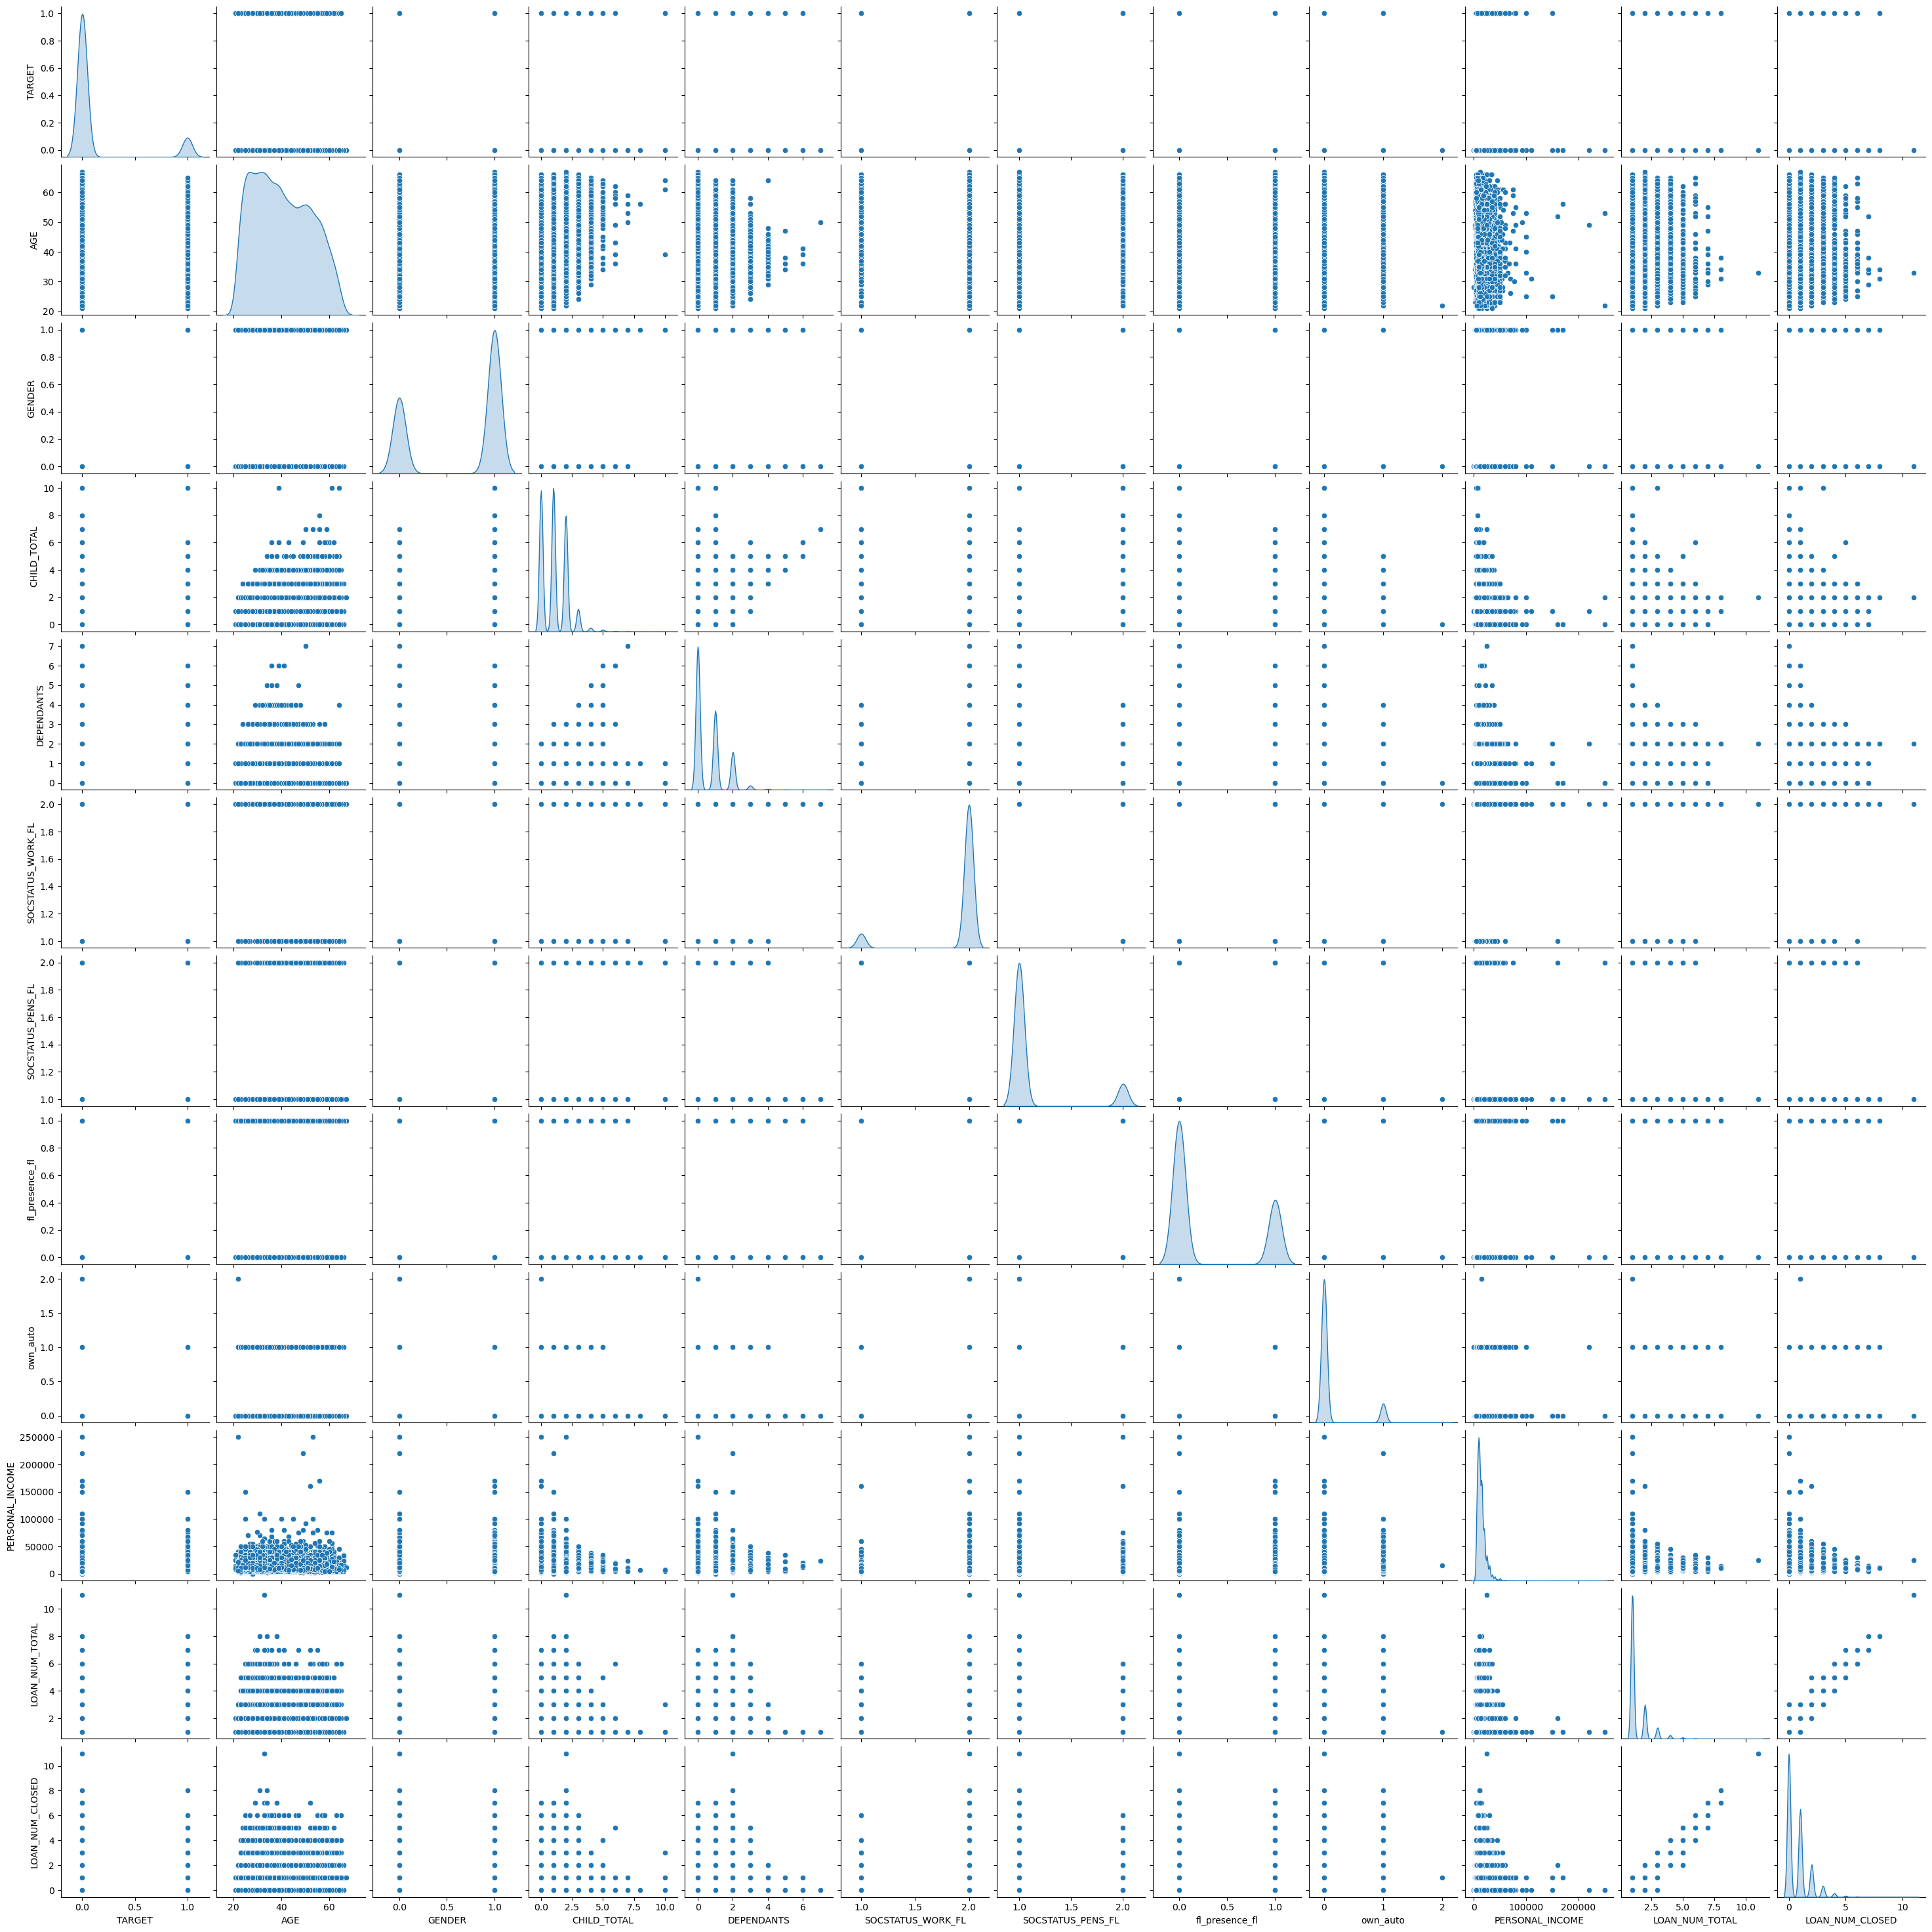

In [84]:
### Ваш код здесь ###
# Визуализируем попарную корреляцию признаков
sns.pairplot(data=df_clear, diag_kind="kde")

In [81]:
# Закодируем категориальные переменные
df_code = df_clear.copy()
columns_category = ['education', 'marital_status',
                    'reg_address_province', 'fact_address_province', 'postal_address_province',
                    'family_income']
ohe = OneHotEncoder(sparse = False) 
encoded_df = pd.DataFrame(ohe.fit_transform(df_code[columns_category]))
encoded_df.columns = ohe.get_feature_names_out()
df_code = pd.concat([df_code, encoded_df], axis=1)#.drop([columns_category], axis=1)
df_code.drop(columns_category, axis=1, inplace=True)
df_code

,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,fl_presence_fl,own_auto,PERSONAL_INCOME,...,postal_address_province_Чувашия,postal_address_province_Эвенкийский АО,postal_address_province_Якутия,postal_address_province_Ямало-Ненецкий АО,postal_address_province_Ярославская область,family_income_до 5000 руб.,family_income_от 10000 до 20000 руб.,family_income_от 20000 до 50000 руб.,family_income_от 5000 до 10000 руб.,family_income_свыше 50000 руб.
0,0.0,49.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,32.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,52.0,1.0,4.0,0.0,2.0,1.0,0.0,0.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,39.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,25000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,30.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,0.0,25.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15219,0.0,51.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15220,0.0,22.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,6000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15221,0.0,60.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,4500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [87]:
# Нормализуем данные
norm_columns = df_code[df_code.columns[df_code.columns != 'TARGET']].columns
df_code_normal = df_code.copy()
df_code_normal[norm_columns] = preprocessing.normalize(df_code_normal[norm_columns], norm='l2')
df_code_normal.head(3)

,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,fl_presence_fl,own_auto,PERSONAL_INCOME,...,postal_address_province_Чувашия,postal_address_province_Эвенкийский АО,postal_address_province_Якутия,postal_address_province_Ямало-Ненецкий АО,postal_address_province_Ярославская область,family_income_до 5000 руб.,family_income_от 10000 до 20000 руб.,family_income_от 20000 до 50000 руб.,family_income_от 5000 до 10000 руб.,family_income_свыше 50000 руб.
0,0.0,0.009800,0.000200,0.000400,0.00020,0.000400,0.000200,0.0,0.0,0.999952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000200,0.0,0.0,0.0
1,0.0,0.002667,0.000083,0.000250,0.00025,0.000167,0.000083,0.0,0.0,0.999996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000083,0.0,0.0,0.0
2,0.0,0.005778,0.000111,0.000444,0.00000,0.000222,0.000111,0.0,0.0,0.999983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000111,0.0,0.0,0.0


In [95]:
# раздедлите на обучающую и тестовую выборки

# Ваш код здесь
train, test = train_test_split(df_code_normal, train_size=0.7, random_state=3)
x_train = train.drop(['TARGET'], axis=1)
y_train = train['TARGET']
x_test = test.drop(['TARGET'], axis=1)
y_test = test['TARGET']

In [105]:
# обучите модель методом ближайших соседей

# Ваш код здесь
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print('Точность для обучающей выборки: ', knn.score (x_train, y_train))
print('Точность для тестовой выборки: ', knn.score (x_test, y_test))

Точность для обучающей выборки:  0.8973348348348348
Точность для тестовой выборки:  0.8594263192467703


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

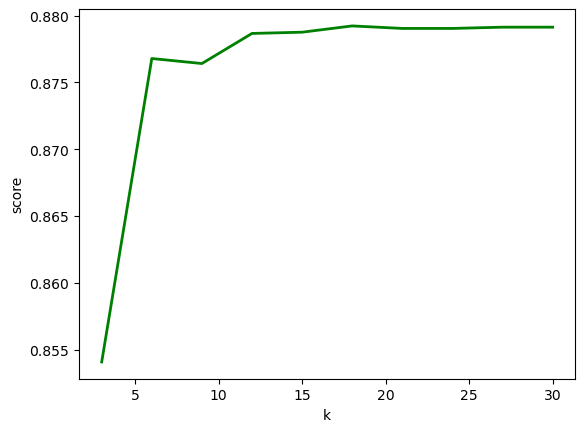

In [139]:
# Подберём оптимальное количество ближайших соседей
score_list = []
loo = LeaveOneOut()
for k in range(3, 33, 3):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', n_jobs=-1)
    score_list.append([k, scores.mean()])
score_df = pd.DataFrame(score_list, columns=['k', 'score'])
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [140]:
# максимальное значение метрики
score_df[score_df['score'] == score_df['score'].max()]

,k,score
5,18,0.879223


**Вывод:** При числе ближайших соседей равном 18 - метрика максимальна.

In [141]:
# обучаем модель с подобранным числоом ближайши соседей
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [142]:
# проверьте качество модели с помощью F-мера

# Ваш код здесь
print(classification_report(y_test, knn.predict(x_test), target_names=['class_1', 'class_2']))

              precision    recall  f1-score   support

     class_1       0.89      1.00      0.94      4042
     class_2       0.00      0.00      0.00       525

    accuracy                           0.89      4567
   macro avg       0.44      0.50      0.47      4567
weighted avg       0.78      0.89      0.83      4567



In [145]:
# проверьте качество модели с помощью матрицы сопряжённостей

# Ваш код здесь
print(f'Матрица сопряжённости:\n{confusion_matrix(y_test, knn.predict(x_test), normalize="all")}')
print(f'Точность:\n{precision_score(y_test, knn.predict(x_test))}')
print(f'Полнота:\n{recall_score(y_test, knn.predict(x_test))}')

Матрица сопряжённости:
[[0.88504489 0.        ]
 [0.11495511 0.        ]]
Точность:
0.0
Полнота:
0.0


    # сделайте вывод о работе модели

    # Ваш текст здесь
**Вывод:** Модель обучилась плохо, так как при хорошой точности и полноте угадывания негативного класса, практически не угадывается позитивный класс.